In [1]:
cd ../Python/

/home/mfruman/DataSci/PBN/Python


In [2]:
import readPBNData.description as rd
import readPBNData.images as ri
import PBNPCA.pca as pca

In [12]:
# load a single pair of miniature and cutout
import os.path
import random
import re
random.seed(666)
featureDir = '../Data/FeatureData/'
fileList = os.listdir(featureDir)
pickstem = random.choice(fileList).split('_')[0]
cutout_name, mini_name = [hooray for hooray in fileList if re.match(pickstem+'_',hooray)]
cutout_name, mini_name

('10935_cutout_100_x_100.jpg', '10935_mini_100_x_100.jpg')

In [20]:
# get image objects
import PIL.Image as Image
cutout = Image.open(featureDir + cutout_name)
mini = Image.open(featureDir + mini_name)

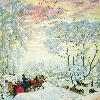

In [21]:
mini

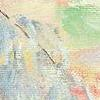

In [22]:
cutout

In [28]:
cutout_colours = cutout.getcolors()

In [30]:
print(cutout)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x7EFD92D691D0>


In [42]:
import colorsys
rgblist = list(cutout.getdata())
rgblist = [(1.0*r/256,1.0*g/256,1.0*b/256) for (r,g,b) in rgblist]
hsvlist = [colorsys.rgb_to_hsv(*rgb) for rgb in rgblist]
hsvlist[:3], rgblist[:3]

([(0.08695652173913043, 0.1940928270042194, 0.92578125),
  (0.08695652173913043, 0.20175438596491227, 0.890625),
  (0.08695652173913043, 0.2062780269058296, 0.87109375)],
 [(0.92578125, 0.83984375, 0.74609375),
  (0.890625, 0.8046875, 0.7109375),
  (0.87109375, 0.78515625, 0.69140625)])

In [61]:
allgrey = [(h,0,v) for (h,s,v) in hsvlist]
rgb_allgrey = [colorsys.hsv_to_rgb(*ag) for ag in allgrey]

In [62]:
rgb_saturate[:10]

[(0.92578125, 0.92578125, 0.92578125),
 (0.890625, 0.890625, 0.890625),
 (0.87109375, 0.87109375, 0.87109375),
 (0.8828125, 0.8828125, 0.8828125),
 (0.9140625, 0.9140625, 0.9140625),
 (0.93359375, 0.93359375, 0.93359375),
 (0.94140625, 0.94140625, 0.94140625),
 (0.953125, 0.953125, 0.953125),
 (0.953125, 0.953125, 0.953125),
 (0.91796875, 0.91796875, 0.91796875)]

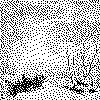

In [66]:
mini.convert(mode='1')